创建Fe元素对象, 查询Fe的电子结构: [Ar].3d<sup>6</sup>.4s<sup>2</sup>

In [1]:
from pymatgen import Element
symbol = "Fe"
el = Element(symbol)
elec_structure = el.full_electronic_structure
%col 8 elec_structure

(1, 's', 2)|(2, 's', 2)|(2, 'p', 6)|(3, 's', 2)|(3, 'p', 6)|(3, 'd', 6)|(4, 's', 2)|


绘制电子结构图

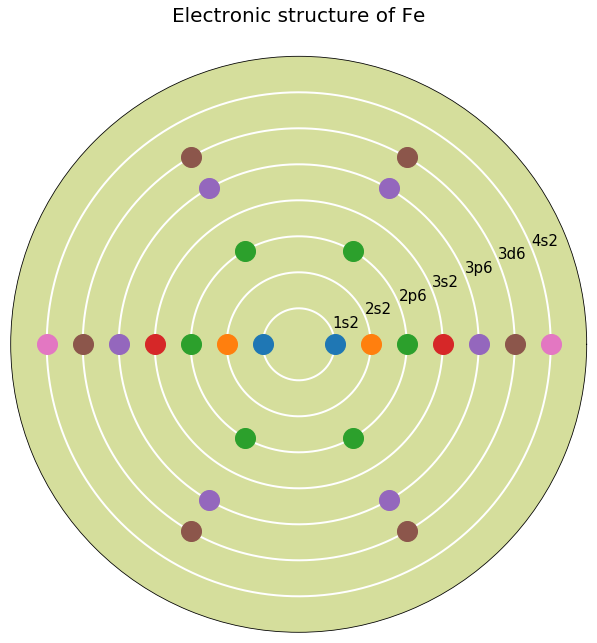

In [2]:
import numpy as np
from matplotlib.pyplot import figure, show, rc, grid
%matplotlib inline

# 设置绘图对象的属性
rc('grid', color='#316931', linewidth=0, linestyle=':')
rc('xtick', labelsize=15); rc('ytick', labelsize=15)

# 极图图层
fig = figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True, facecolor='#d5de9c')

rticks = []; rlabels = []
for i, shell in enumerate(elec_structure):
    # 每一层的圆圈
    r = 0.5 * (i + 1)#圆圈点的半径
    rad = [r] * 1000 #圆圈有1000个点组成
    theta = np.linspace(0,2*np.pi,1000)     #将角度分为1000份
    ax.plot(theta, rad, 'w-', lw=2)         #根据角度和和半径绘制极图
    
    #Draw the electrons
    rad = [r] * shell[2]
    theta = np.linspace(0, 2*np.pi, shell[2], endpoint=False )#如果包含最后一个点, 收尾点重叠  
    ax.plot(theta, rad, 'o', markersize=20)
    
    rticks.append(r)
    rlabels.append("{}{}{}".format(shell[0], shell[1], shell[2]))

ax.set_rmax(r + 0.5)
ax.set_thetagrids([0, 90, 180, 270], [""]*4, color='k')
ax.set_rgrids(rticks, rlabels)
ax.set_title("Electronic structure of {}".format(symbol), fontsize=20)
grid(True)
show()